In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ensures that the display width isn't restricted
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('Network_anomaly_data.csv')
df['is_attack'] = df['attack'].apply(lambda x: 'normal' if x=='normal' else 'attack')
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [5]:
odf = pd.DataFrame(columns=['col','q1','q3','IQR','ulimit','llimit','inliers','outliers','%inliers','%outliers'])

for col in df.columns:
  if df[col].dtype == 'int64' or df[col].dtype == 'float64':
    q1 = np.percentile(df[col],25)
    q3 = np.percentile(df[col],75)
    IQR = q3-q1
    ulimit = q3+(1.5*IQR)
    llimit = q1-(1.5*IQR)
    filtered = df[np.logical_and(df[col]>=llimit,df[col]<=ulimit)]
    inliers = filtered.shape[0]
    outliers = df.shape[0] - inliers
    perc_inliers = (inliers/df.shape[0])*100
    perc_outliers = (outliers/df.shape[0])*100
    odf.loc[len(odf)] = {'col':col,'q1':q1,'q3':q3,'IQR':IQR,'ulimit':ulimit,'llimit':llimit,'inliers':inliers,'outliers':outliers,'%inliers':perc_inliers,'%outliers':perc_outliers}


In [6]:
odf.head()

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
0,duration,0.0,0.0,0.0,0.0,0.0,115955,10018,92.047502,7.952498
1,srcbytes,0.0,276.0,276.0,690.0,-414.0,112133,13840,89.013519,10.986481
2,dstbytes,0.0,516.0,516.0,1290.0,-774.0,102394,23579,81.282497,18.717503
3,land,0.0,0.0,0.0,0.0,0.0,125948,25,99.980154,0.019846
4,wrongfragment,0.0,0.0,0.0,0.0,0.0,124883,1090,99.134735,0.865265


In [7]:
odf.shape

(39, 10)

In [8]:
# land, wrongfragment,urgent, numfailedlogins,loggedin,rootshell,suattempted,numshells,ishostlogin,isguestlogin
df['land'] = df['land'].astype('category')
df['wrongfragment'] = df['wrongfragment'].astype('category')
df['urgent'] = df['urgent'].astype('category')
df['numfailedlogins'] = df['numfailedlogins'].astype('category')
df['loggedin'] = df['loggedin'].astype('category')
df['rootshell'] = df['rootshell'].astype('category')
df['suattempted'] = df['suattempted'].astype('category')
df['numshells'] = df['numshells'].astype('category')
df['ishostlogin'] = df['ishostlogin'].astype('category')
df['isguestlogin'] = df['isguestlogin'].astype('category')
df['flag'] = df['flag'].astype('category')
df['protocoltype'] = df['protocoltype'].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   duration                125973 non-null  int64   
 1   protocoltype            125973 non-null  category
 2   service                 125973 non-null  object  
 3   flag                    125973 non-null  category
 4   srcbytes                125973 non-null  int64   
 5   dstbytes                125973 non-null  int64   
 6   land                    125973 non-null  category
 7   wrongfragment           125973 non-null  category
 8   urgent                  125973 non-null  category
 9   hot                     125973 non-null  int64   
 10  numfailedlogins         125973 non-null  category
 11  loggedin                125973 non-null  category
 12  numcompromised          125973 non-null  int64   
 13  rootshell               125973 non-null  category
 14  suat

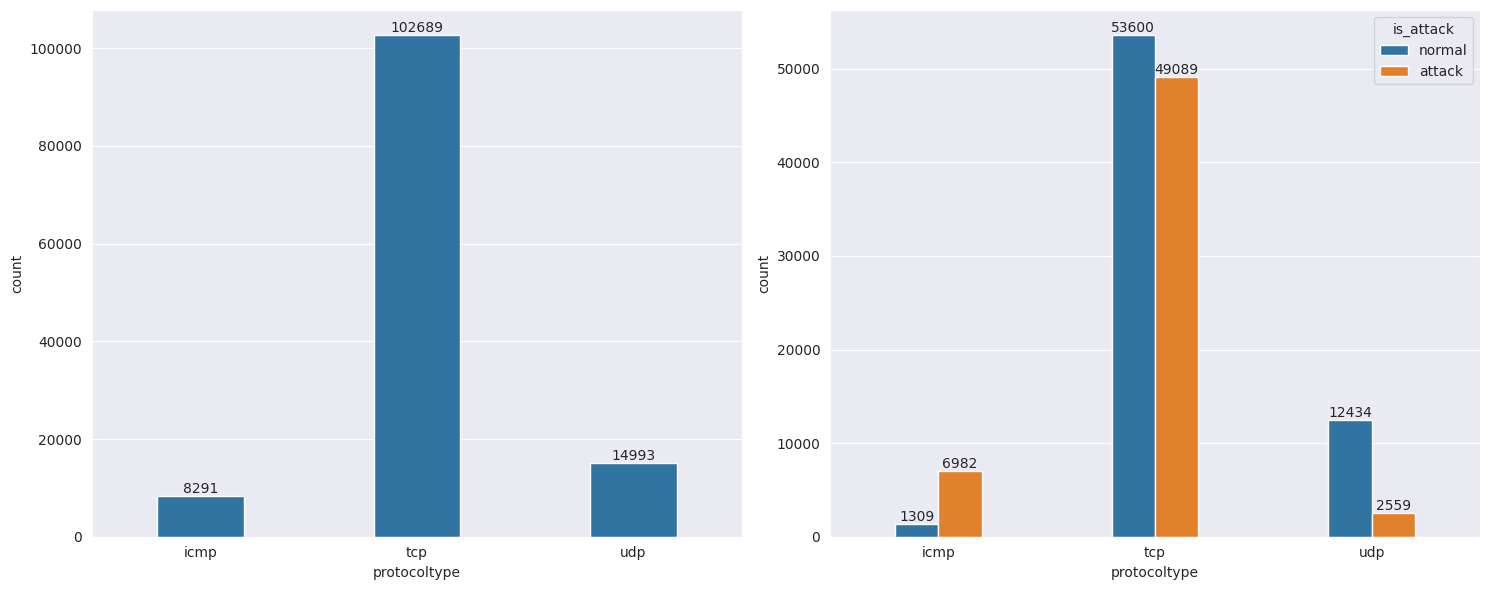

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot without hue (first subplot)
sns.countplot(x='protocoltype', data=df, ax=axes[0], width=0.4)
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Count plot with hue (second subplot)
sns.countplot(x='protocoltype', hue='is_attack', data=df, ax=axes[1], width=0.4)
for bar in axes[1].patches:
    height = bar.get_height()
    if height > 0:
          axes[1].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Display plot
plt.tight_layout()
plt.show()

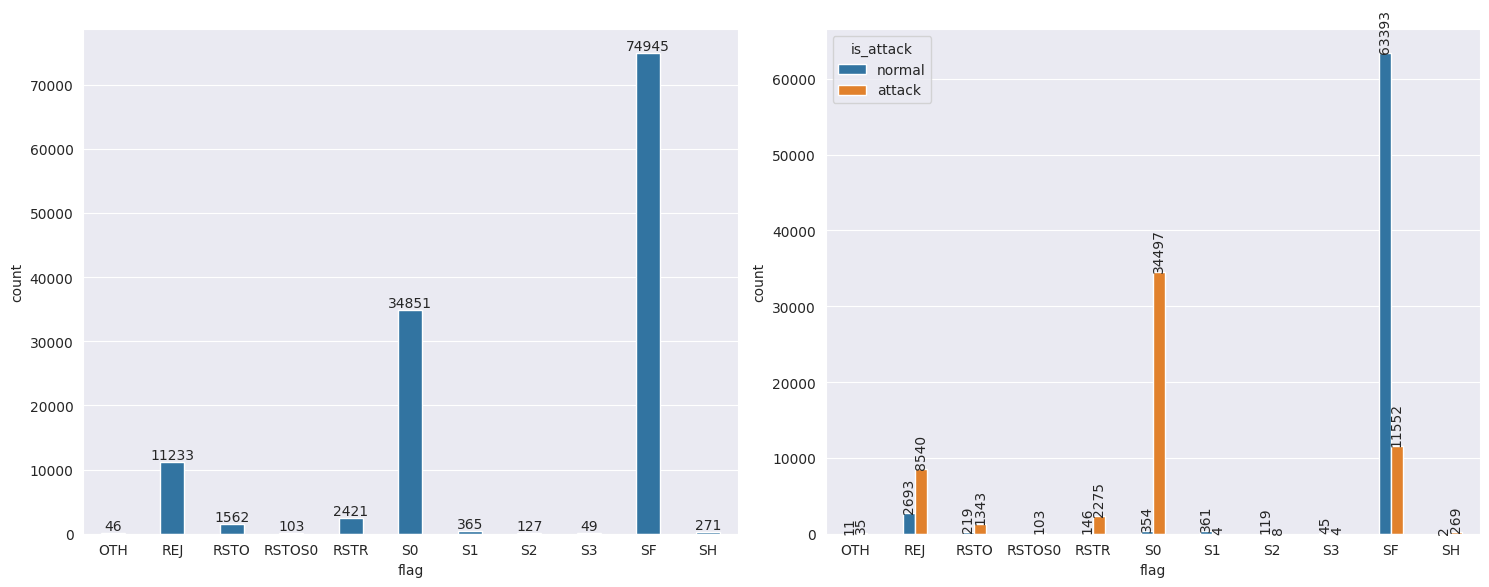

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot without hue (first subplot)
sns.countplot(x='flag', data=df, ax=axes[0], width=0.4)
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Count plot with hue (second subplot)
sns.countplot(x='flag', hue='is_attack', data=df, ax=axes[1], width=0.4)
for bar in axes[1].patches:
    height = bar.get_height()
    if height > 0:
          axes[1].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10,rotation=90)

# Display plot
plt.tight_layout()
plt.show()

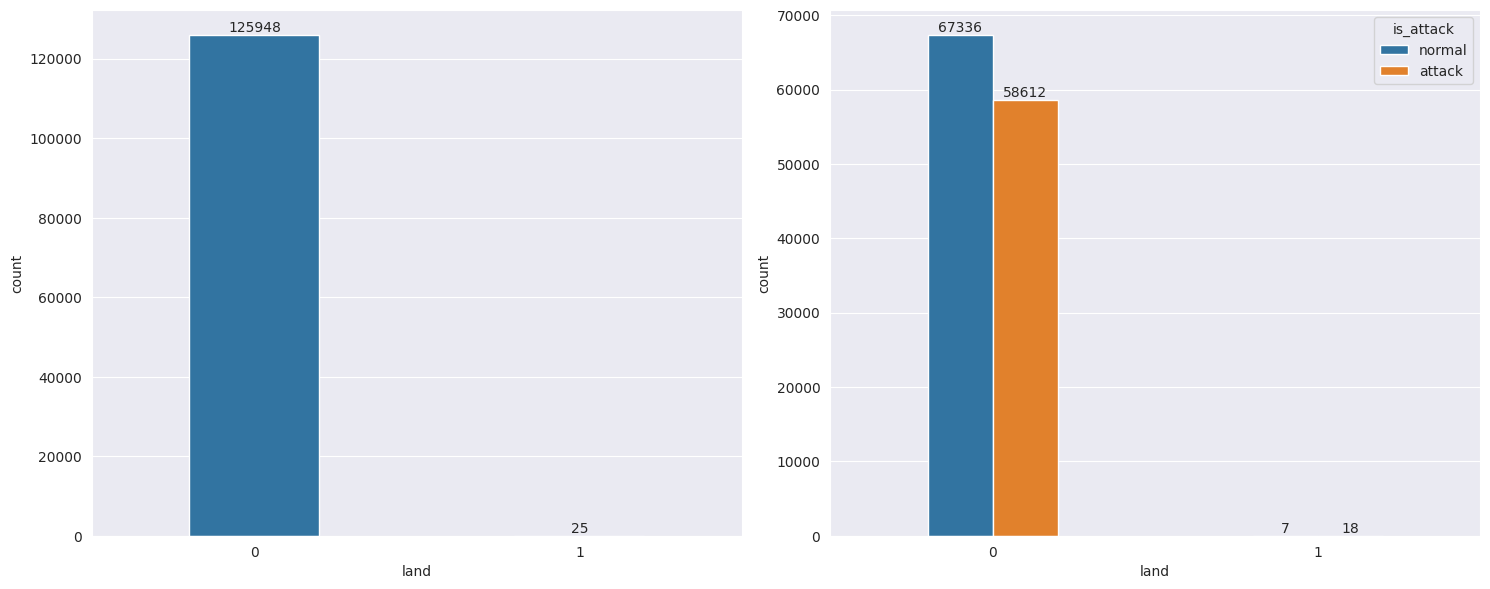

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot without hue (first subplot)
sns.countplot(x='land', data=df, ax=axes[0], width=0.4)
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Count plot with hue (second subplot)
sns.countplot(x='land', hue='is_attack', data=df, ax=axes[1], width=0.4)
for bar in axes[1].patches:
    height = bar.get_height()
    if height > 0:
          axes[1].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Display plot
plt.tight_layout()
plt.show()

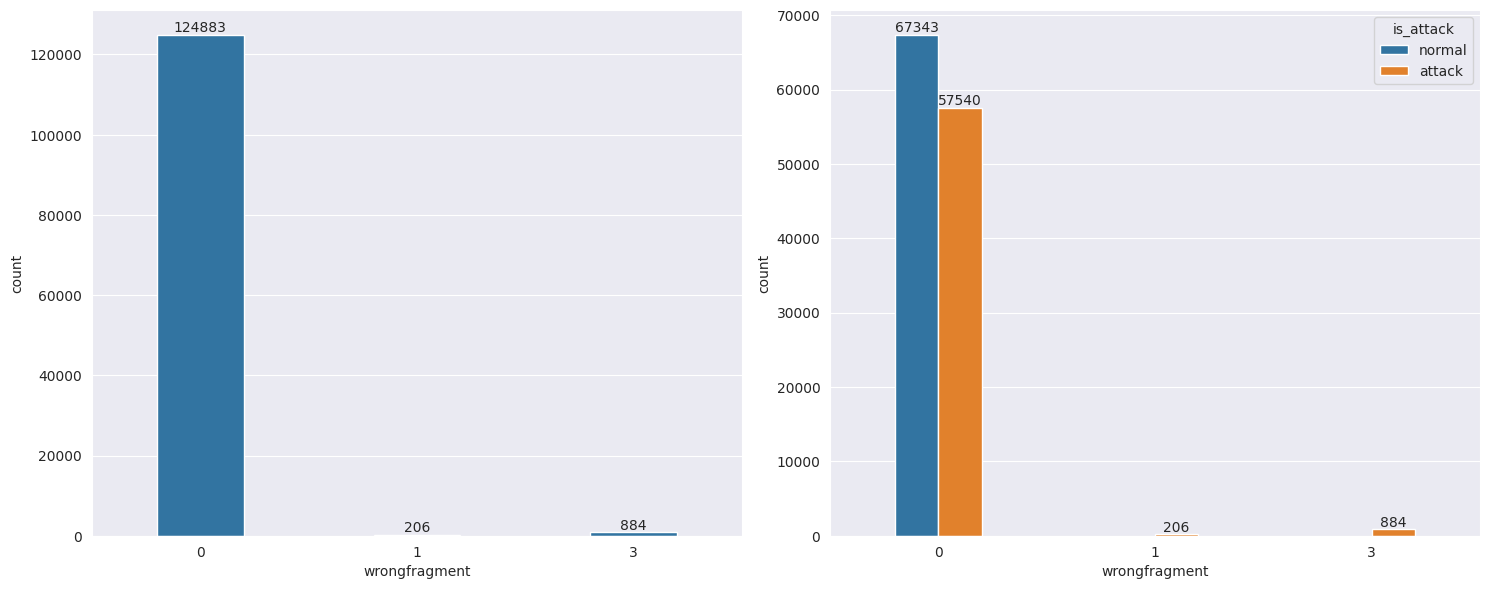

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot without hue (first subplot)
sns.countplot(x='wrongfragment', data=df, ax=axes[0], width=0.4)
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Count plot with hue (second subplot)
sns.countplot(x='wrongfragment', hue='is_attack', data=df, ax=axes[1], width=0.4)
for bar in axes[1].patches:
    height = bar.get_height()
    if height > 0:
          axes[1].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Display plot
plt.tight_layout()
plt.show()

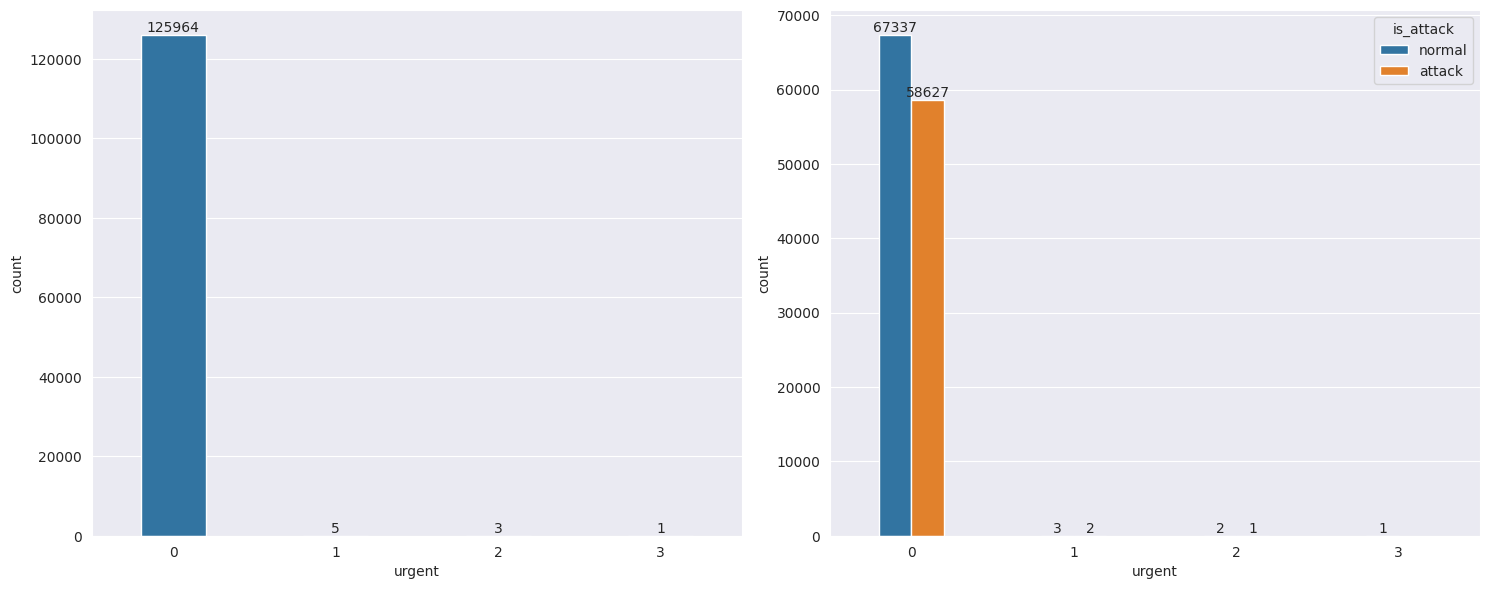

In [14]:
# land, wrongfragment,urgent, numfailedlogins,loggedin,rootshell,suattempted,numshells,ishostlogin,isguestlogin
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot without hue (first subplot)
sns.countplot(x='urgent', data=df, ax=axes[0], width=0.4)
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Count plot with hue (second subplot)
sns.countplot(x='urgent', hue='is_attack', data=df, ax=axes[1], width=0.4)
for bar in axes[1].patches:
    height = bar.get_height()
    if height > 0:
          axes[1].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Display plot
plt.tight_layout()
plt.show()

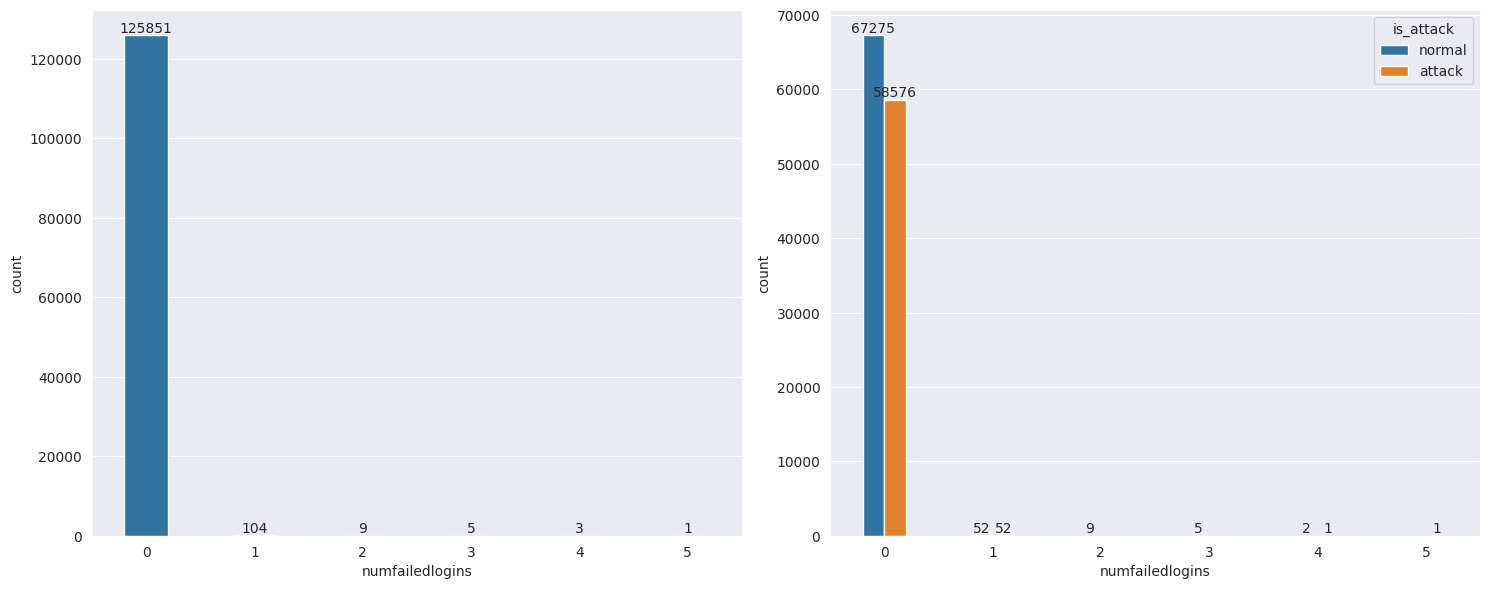

In [15]:
# land, wrongfragment,urgent, numfailedlogins,loggedin,rootshell,suattempted,numshells,ishostlogin,isguestlogin
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot without hue (first subplot)
sns.countplot(x='numfailedlogins', data=df, ax=axes[0], width=0.4)
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Count plot with hue (second subplot)
sns.countplot(x='numfailedlogins', hue='is_attack', data=df, ax=axes[1], width=0.4)
for bar in axes[1].patches:
    height = bar.get_height()
    if height > 0:
          axes[1].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Display plot
plt.tight_layout()
plt.show()

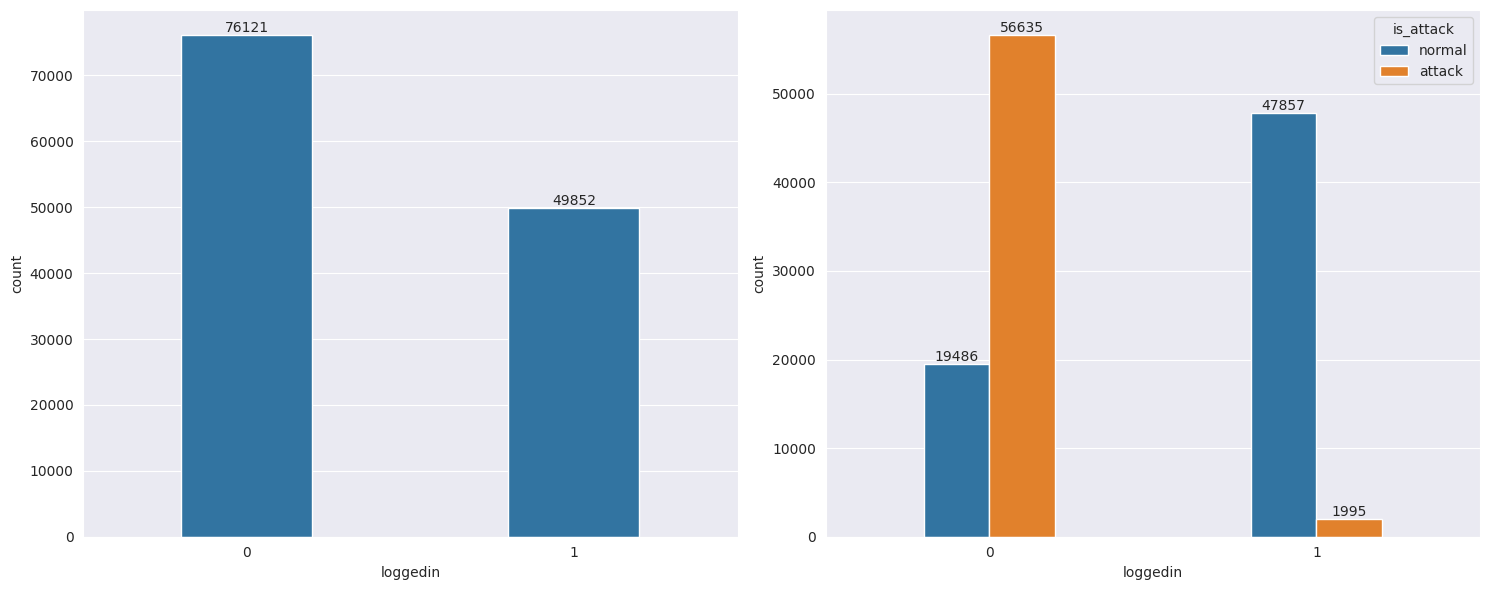

In [16]:
# land, wrongfragment,urgent, numfailedlogins,loggedin,rootshell,suattempted,numshells,ishostlogin,isguestlogin
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot without hue (first subplot)
sns.countplot(x='loggedin', data=df, ax=axes[0], width=0.4)
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Count plot with hue (second subplot)
sns.countplot(x='loggedin', hue='is_attack', data=df, ax=axes[1], width=0.4)
for bar in axes[1].patches:
    height = bar.get_height()
    if height > 0:
          axes[1].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Display plot
plt.tight_layout()
plt.show()

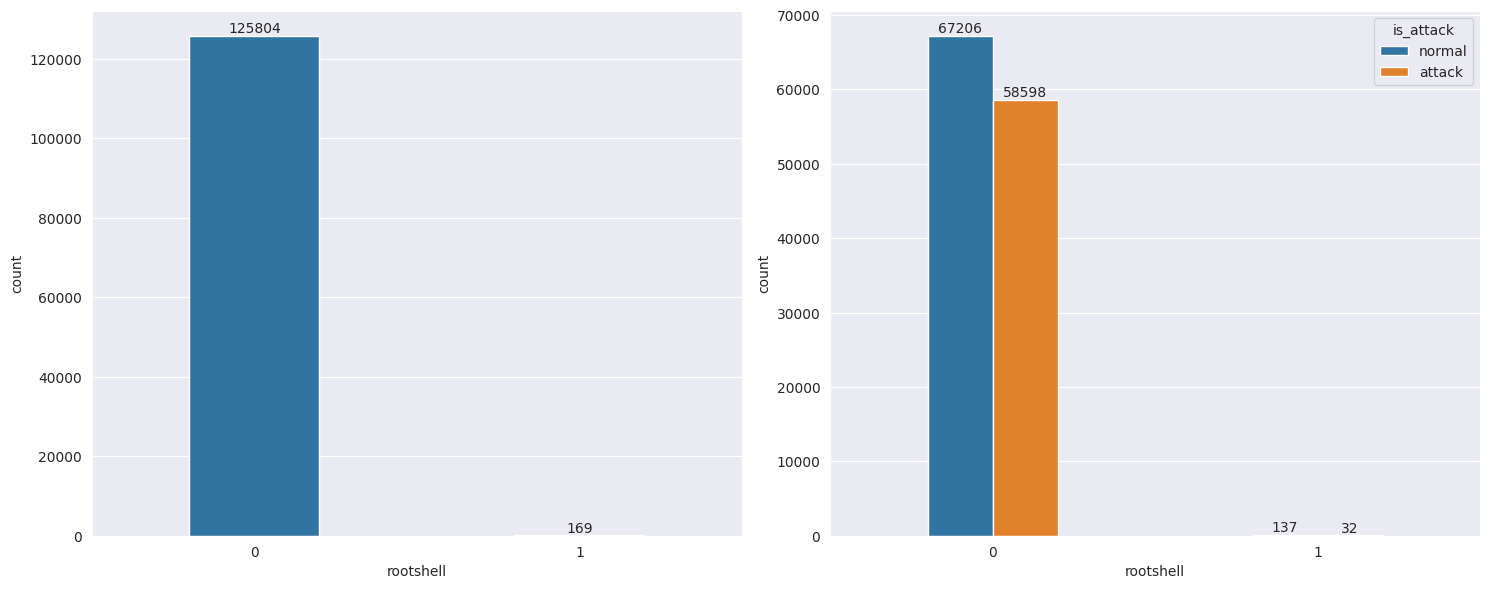

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot without hue (first subplot)
sns.countplot(x='rootshell', data=df, ax=axes[0], width=0.4)
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Count plot with hue (second subplot)
sns.countplot(x='rootshell', hue='is_attack', data=df, ax=axes[1], width=0.4)
for bar in axes[1].patches:
    height = bar.get_height()
    if height > 0:
          axes[1].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Display plot
plt.tight_layout()
plt.show()

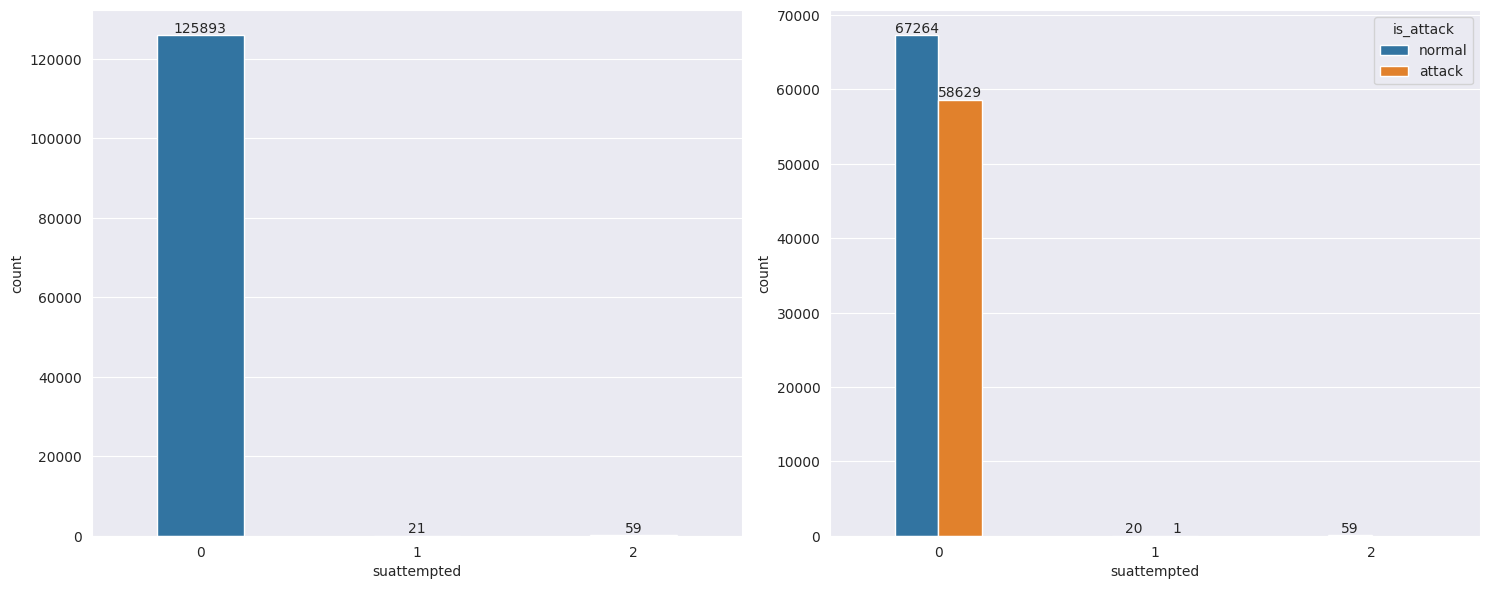

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot without hue (first subplot)
sns.countplot(x='suattempted', data=df, ax=axes[0], width=0.4)
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Count plot with hue (second subplot)
sns.countplot(x='suattempted', hue='is_attack', data=df, ax=axes[1], width=0.4)
for bar in axes[1].patches:
    height = bar.get_height()
    if height > 0:
          axes[1].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Display plot
plt.tight_layout()
plt.show()

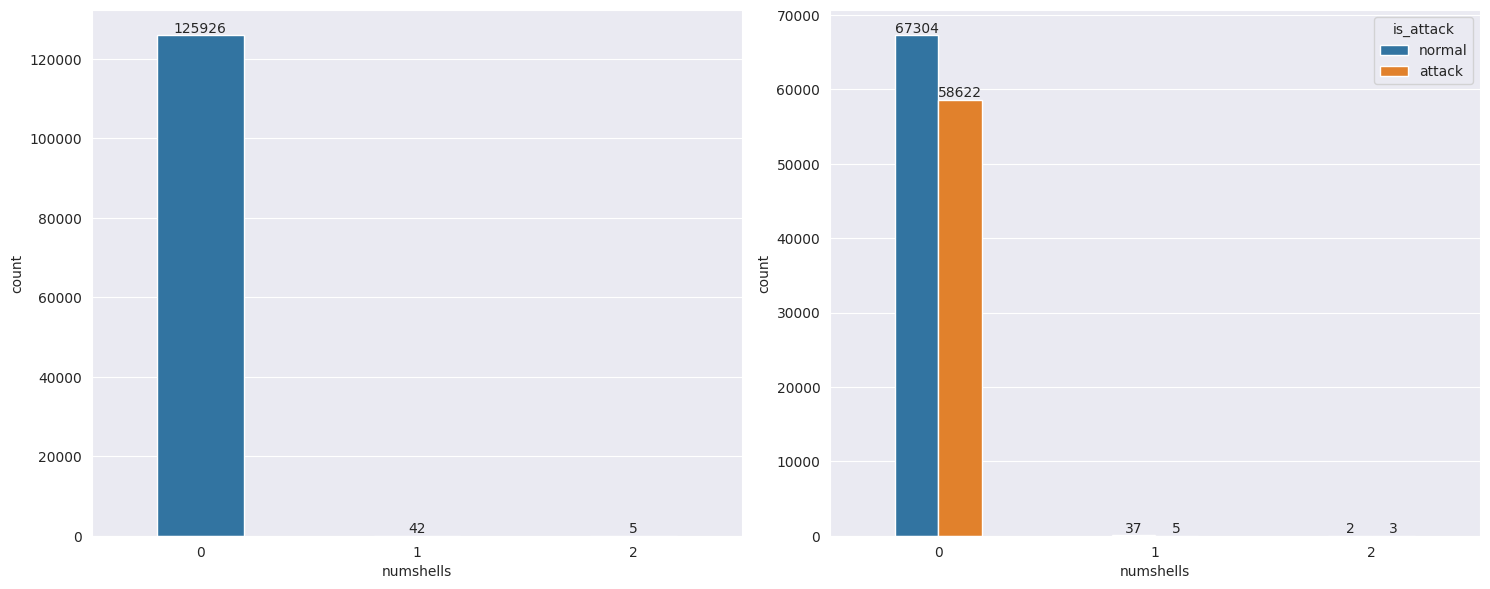

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot without hue (first subplot)
sns.countplot(x='numshells', data=df, ax=axes[0], width=0.4)
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Count plot with hue (second subplot)
sns.countplot(x='numshells', hue='is_attack', data=df, ax=axes[1], width=0.4)
for bar in axes[1].patches:
    height = bar.get_height()
    if height > 0:
          axes[1].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Display plot
plt.tight_layout()
plt.show()

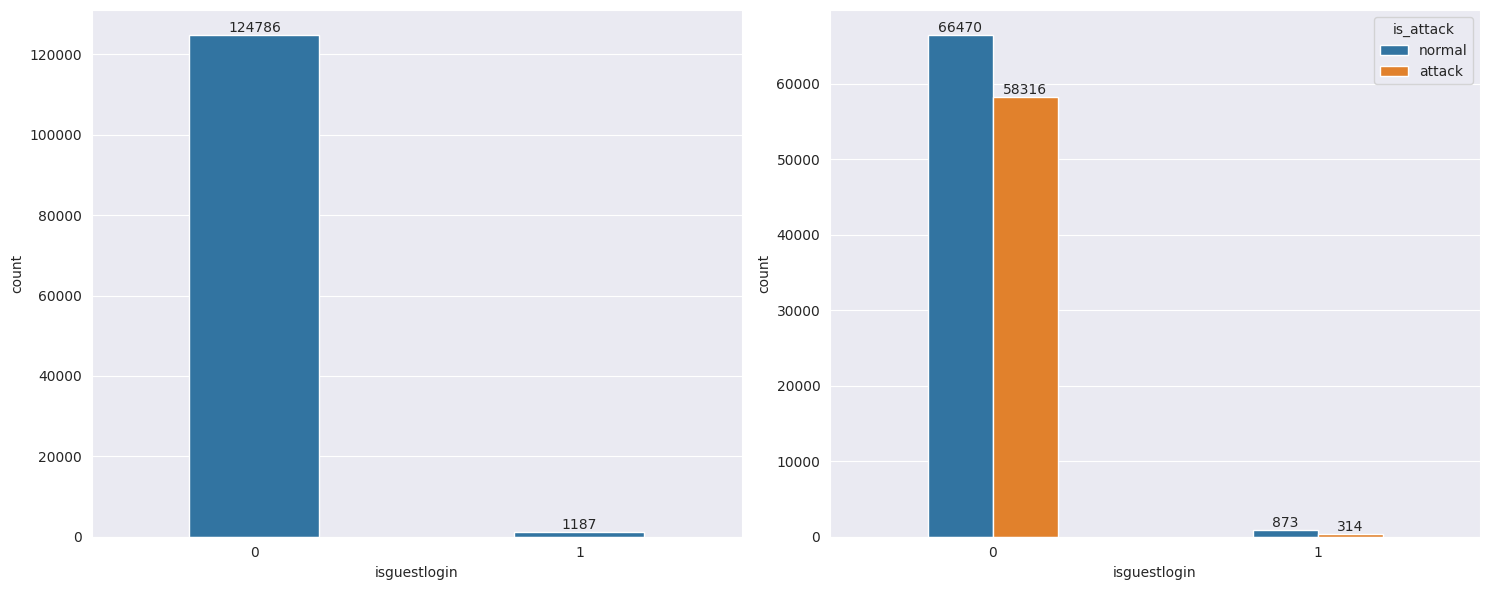

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot without hue (first subplot)
sns.countplot(x='isguestlogin', data=df, ax=axes[0], width=0.4)
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Count plot with hue (second subplot)
sns.countplot(x='isguestlogin', hue='is_attack', data=df, ax=axes[1], width=0.4)
for bar in axes[1].patches:
    height = bar.get_height()
    if height > 0:
          axes[1].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Display plot
plt.tight_layout()
plt.show()

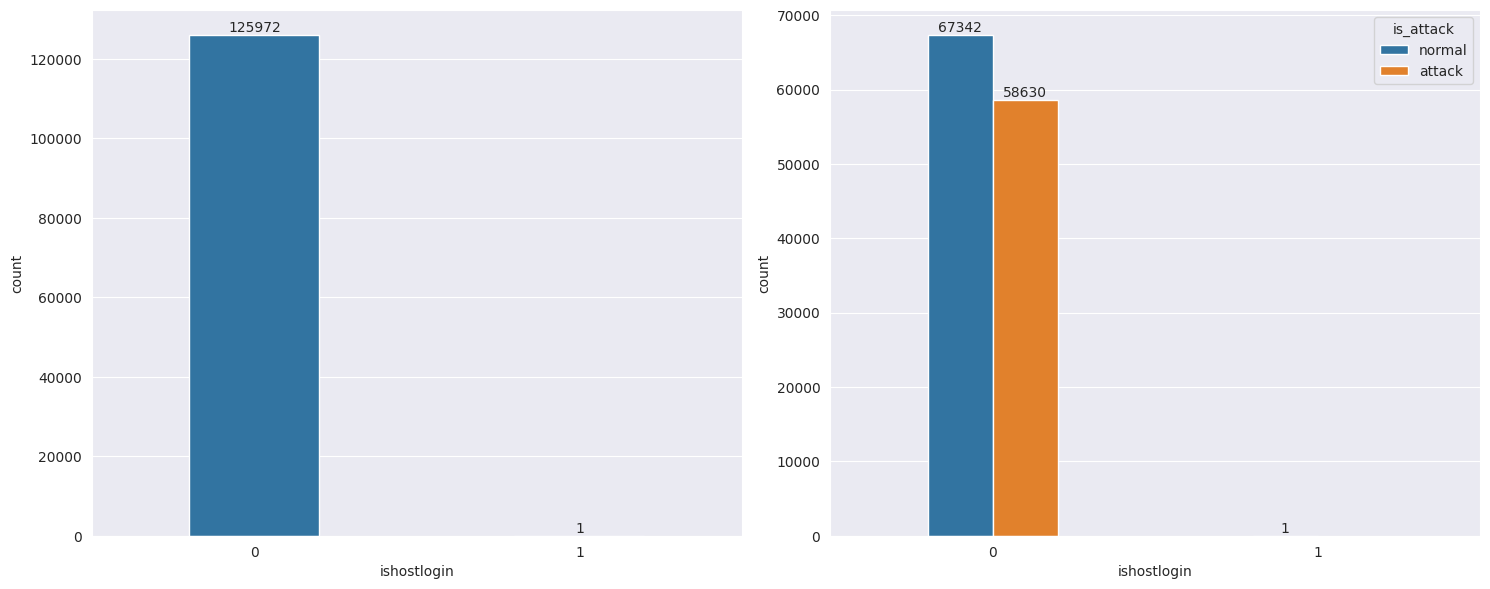

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot without hue (first subplot)
sns.countplot(x='ishostlogin', data=df, ax=axes[0], width=0.4)
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Count plot with hue (second subplot)
sns.countplot(x='ishostlogin', hue='is_attack', data=df, ax=axes[1], width=0.4)
for bar in axes[1].patches:
    height = bar.get_height()
    if height > 0:
          axes[1].text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position slightly above the bar
                 f'{height:.0f}', ha='center', va='bottom', fontsize=10)

# Display plot
plt.tight_layout()
plt.show()

In [22]:
df.select_dtypes(include=['int64','float64'])

Output hidden; open in https://colab.research.google.com to view.

<Axes: ylabel='duration'>

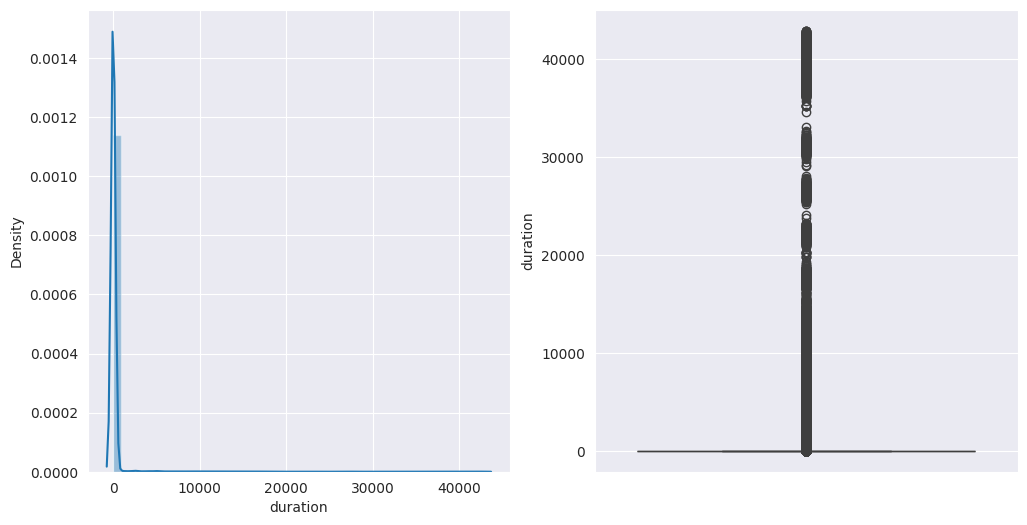

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df['duration'].dropna(),label="duration")
plt.subplot(1,2,2)
sns.boxplot(df['duration'].dropna(),label="duration")

In [24]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers

for i in range(0,110,10):

    print("{} percentile value is {}".format(i,np.percentile(df['duration'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 0.0
90 percentile value is 0.0
100 percentile value is 42908.0


In [25]:
#calculating 90-100th percentile to find a the correct percentile value for removal of outliers

for i in range(90,101,1):

    print("{} percentile value is {}".format(i,np.percentile(df['duration'].dropna(),i)))

90 percentile value is 0.0
91 percentile value is 0.0
92 percentile value is 0.0
93 percentile value is 1.0
94 percentile value is 2.0
95 percentile value is 4.0
96 percentile value is 15.0
97 percentile value is 31.0
98 percentile value is 2050.679999999993
99 percentile value is 9590.559999999998
100 percentile value is 42908.0


In [26]:
odf[odf['col'] == 'duration']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
0,duration,0.0,0.0,0.0,0.0,0.0,115955,10018,92.047502,7.952498


In [27]:
df[df['duration'] > np.percentile(df['duration'],97)]['is_attack'].value_counts()

,count
is_attack,
normal,2605
attack,1174


<Axes: xlabel='srcbytes'>

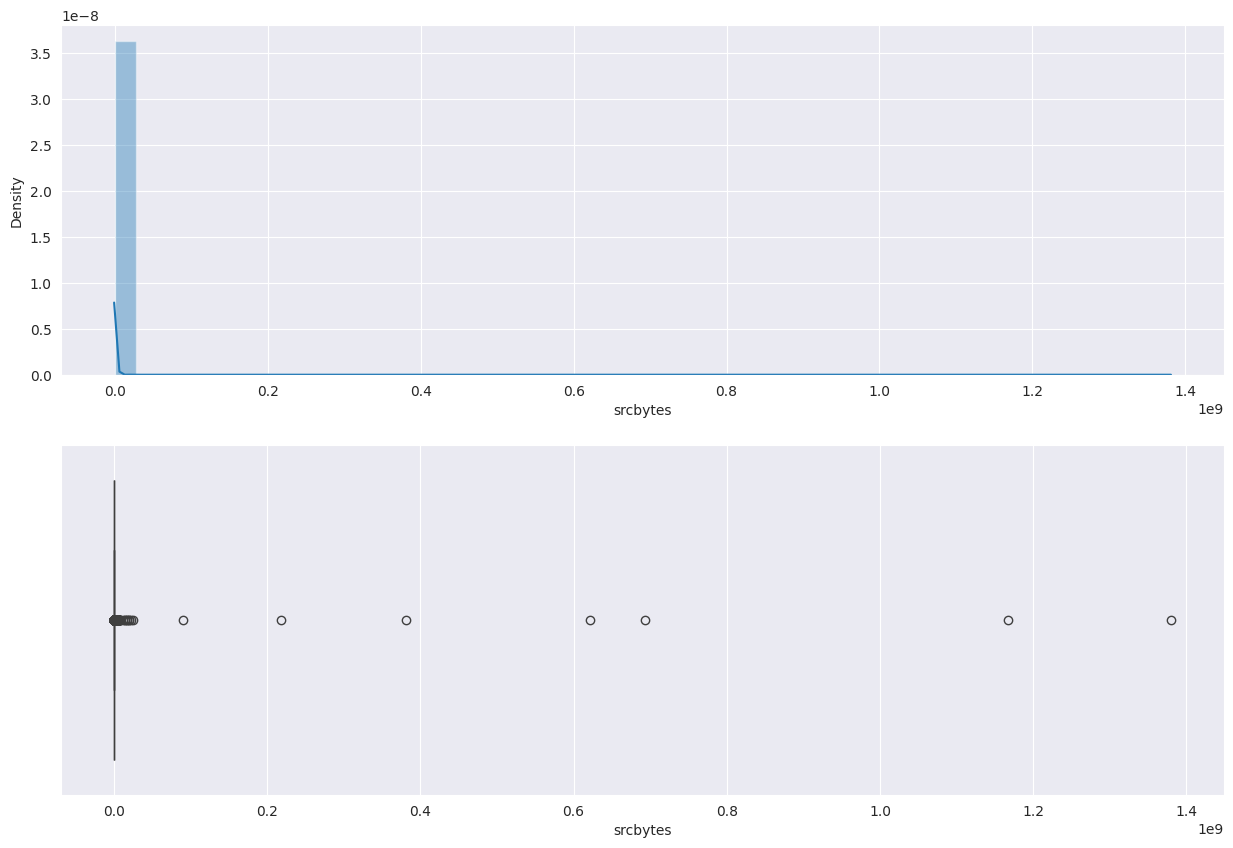

In [28]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.distplot(df['srcbytes'].dropna())
plt.subplot(2,1,2)
sns.boxplot(x=df['srcbytes'].dropna())

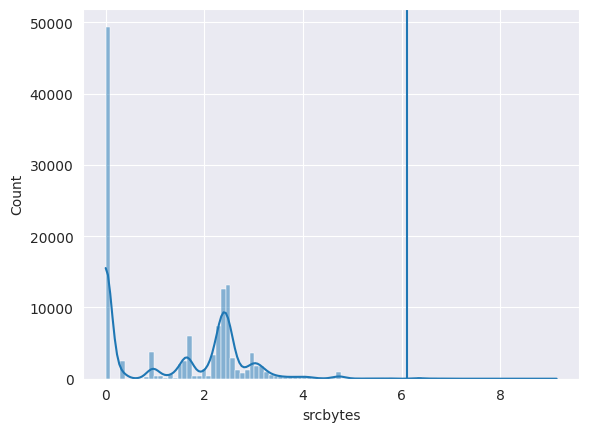

In [29]:
x1 = np.log10(df['srcbytes']+1)
q1,q3 = np.percentile(x1,25),np.percentile(x1,75)
IQR = q3-q1
ulimit = q3+1.5*(IQR)
sns.histplot(x1,kde=True)
plt.axvline(ulimit)

In [30]:
odf[odf['col'] == 'srcbytes']

,col,q1,q3,IQR,ulimit,llimit,inliers,outliers,%inliers,%outliers
1,srcbytes,0.0,276.0,276.0,690.0,-414.0,112133,13840,89.013519,10.986481


In [31]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers

for i in range(0,110,10):

    print("{} percentile value is {}".format(i,np.percentile(df['srcbytes'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 1.0
50 percentile value is 44.0
60 percentile value is 192.0
70 percentile value is 235.0
80 percentile value is 307.0
90 percentile value is 848.0
100 percentile value is 1379963888.0


<Axes: xlabel='hot'>

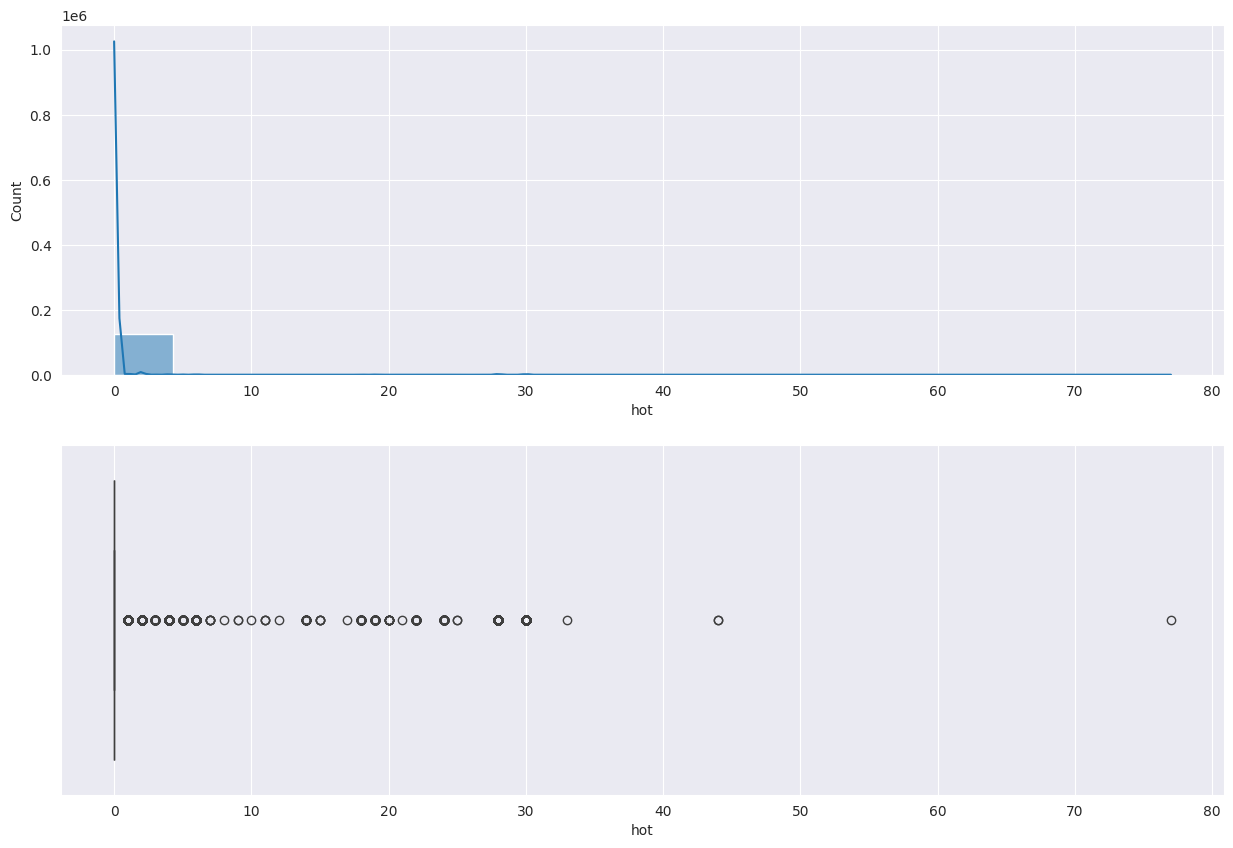

In [32]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(df['hot'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['hot'])

<Axes: xlabel='hot', ylabel='Count'>

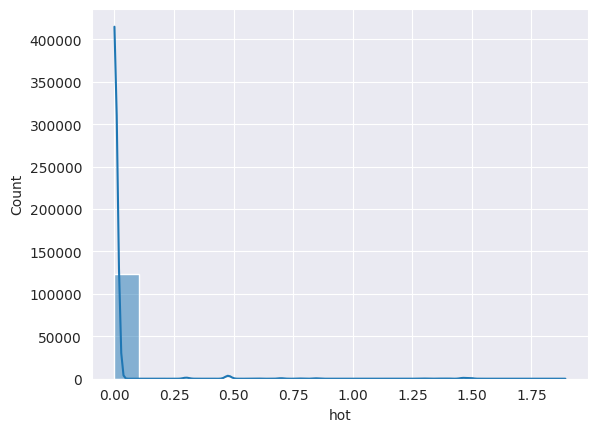

In [33]:
x1 = np.log10(df['hot']+1)
sns.histplot(x1,kde=True)

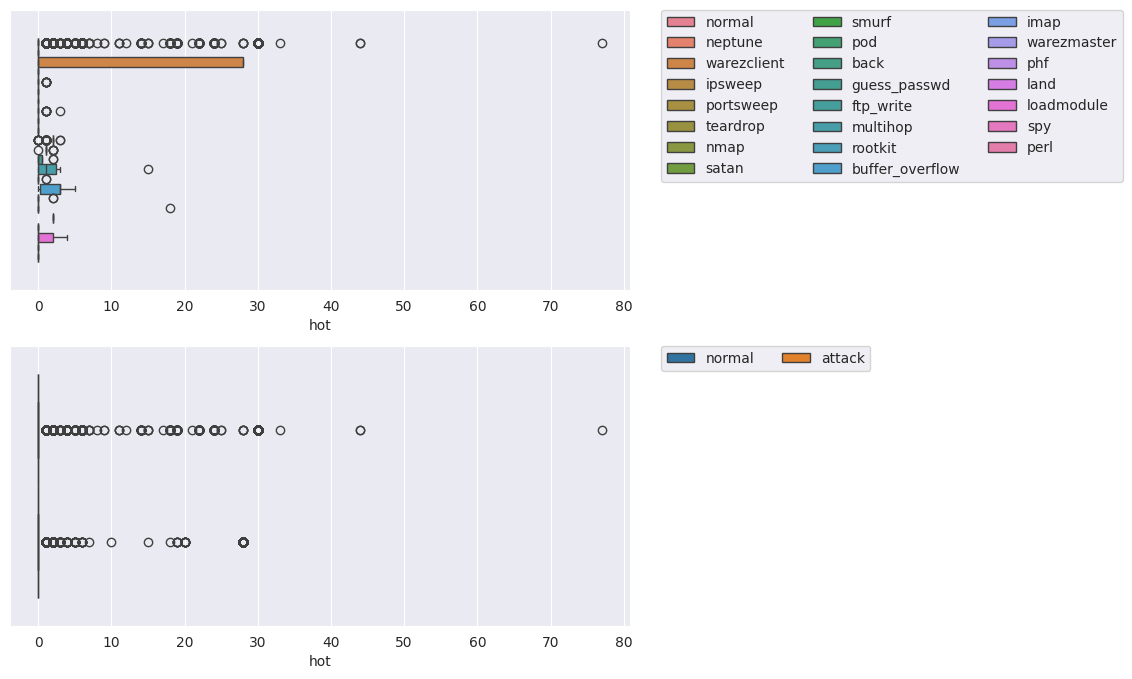

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='hot',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='hot',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [35]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['hot'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 0.0
90 percentile value is 0.0
100 percentile value is 77.0


In [36]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['hot'].dropna(),i)))

90 percentile value is 0.0
91 percentile value is 0.0
92 percentile value is 0.0
93 percentile value is 0.0
94 percentile value is 0.0
95 percentile value is 0.0
96 percentile value is 0.0
97 percentile value is 0.0
98 percentile value is 1.0
99 percentile value is 3.0
100 percentile value is 77.0


<Axes: xlabel='numcompromised'>

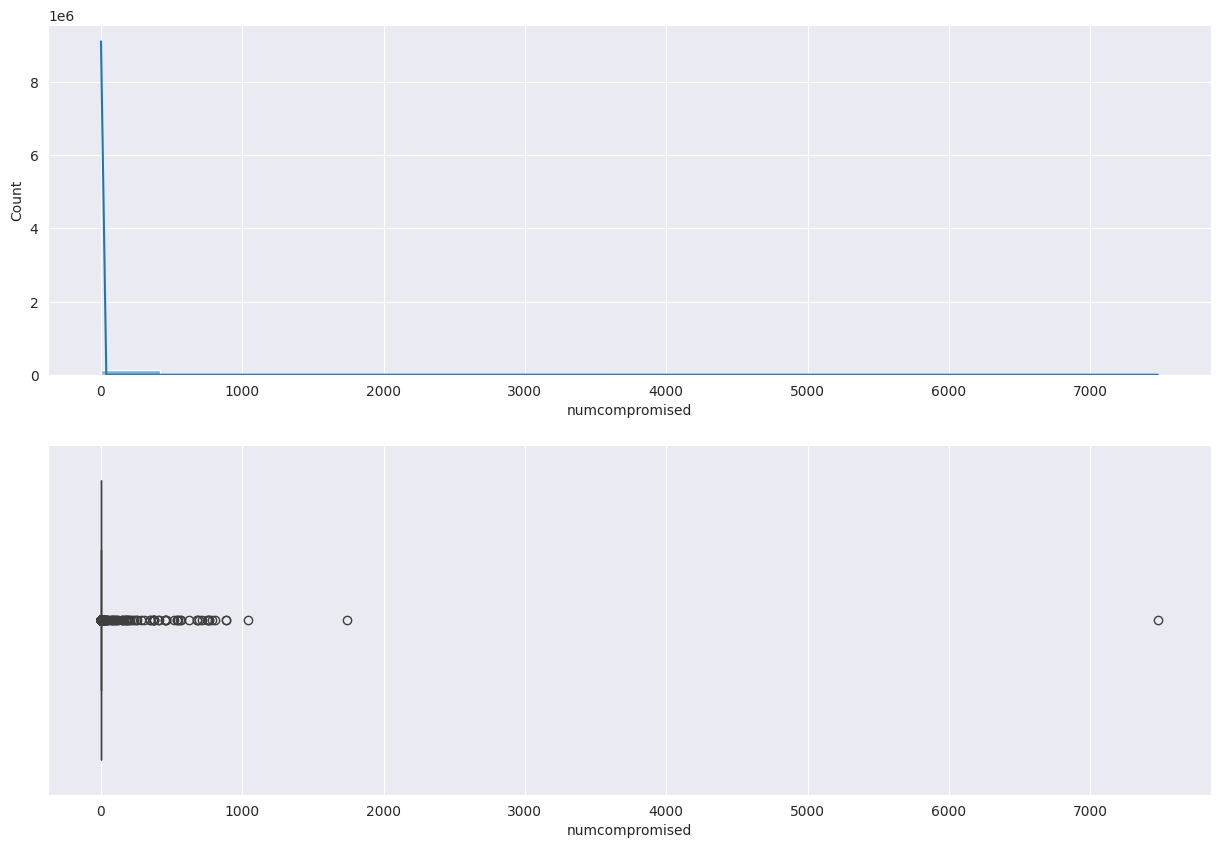

In [37]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.histplot(df['numcompromised'],kde=True)
plt.subplot(2,1,2)
sns.boxplot(x=df['numcompromised'])

<Axes: xlabel='numcompromised', ylabel='Count'>

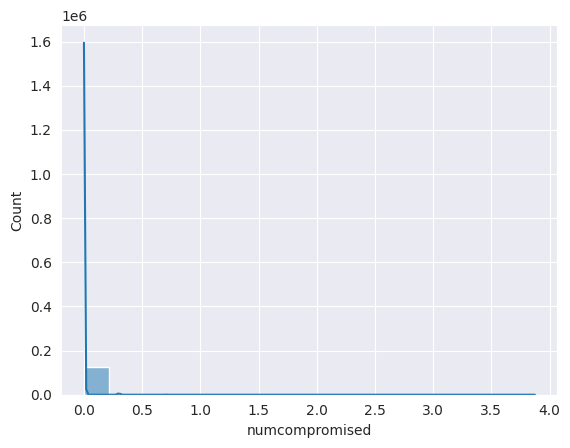

In [38]:
x1 = np.log10(df['numcompromised']+1)
sns.histplot(x1,kde=True)

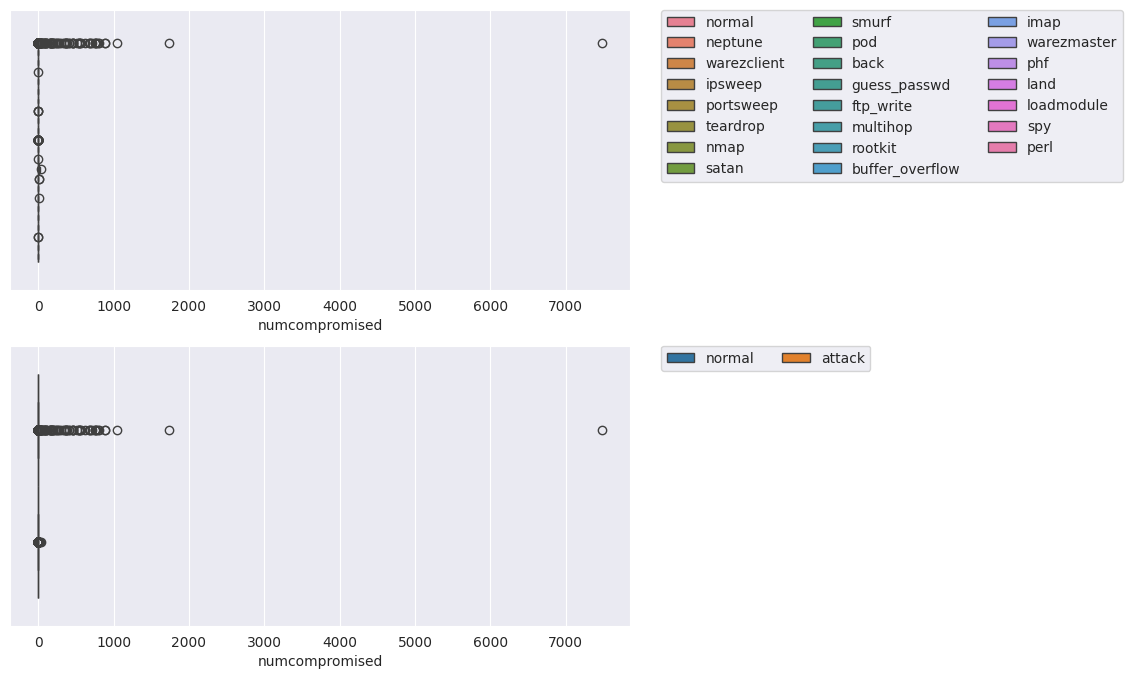

In [39]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
sns.boxplot(data=df,x='numcompromised',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)
plt.subplot(2,1,2)
sns.boxplot(data=df,x='numcompromised',hue='is_attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [40]:
for i in range(0,110,10):
    print("{} percentile value is {}".format(i,np.percentile(df['numcompromised'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 0.0
90 percentile value is 0.0
100 percentile value is 7479.0


In [41]:
for i in range(90,101,1):
    print("{} percentile value is {}".format(i,np.percentile(df['numcompromised'].dropna(),i)))

90 percentile value is 0.0
91 percentile value is 0.0
92 percentile value is 0.0
93 percentile value is 0.0
94 percentile value is 0.0
95 percentile value is 0.0
96 percentile value is 0.0
97 percentile value is 0.0
98 percentile value is 0.0
99 percentile value is 1.0
100 percentile value is 7479.0


In [42]:
df.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes', 'land',
       'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin', 'numcompromised',
       'rootshell', 'suattempted', 'numroot', 'numfilecreations', 'numshells', 'numaccessfiles',
       'numoutboundcmds', 'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate', 'diffsrvrate',
       'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount', 'dsthostsamesrvrate',
       'dsthostdiffsrvrate', 'dsthostsamesrcportrate', 'dsthostsrvdiffhostrate',
       'dsthostserrorrate', 'dsthostsrvserrorrate', 'dsthostrerrorrate', 'dsthostsrvrerrorrate',
       'attack', 'lastflag', 'is_attack'],
      dtype='object')